<font size="6"><center>***Metodos numéricos en finanzas***</center></font>

<font size="5"><center><span style="color:blue">***Nombre y Apellidos: Belén Rodríguez Llorente***</span></center></font>

## Importamos las librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
from math import sin, cos, sqrt, log, exp, pi
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm,t

<font size="6"><center><span style="color:blue">***Práctica final MNFI 2.025***</span></center></font>

Obtener los valores de una opción call y una opción put europeas con vencimiento T=21,52 semanas para los siguientes subyacentes:

In [ ]:
assets=["SAN.MC", "TEF.MC", "IBE.MC", "ITX.MC", "BBVA.MC"]

Con las siguientes consideraciones:   


1. Obtener el valor final del subyacente mediante simulación dinámica con Δt que mejor consideres,argumentándolo, y el mecanismo de transición (ecuación estocástica):

<font size="2">
$$
S \leftarrow S + S(r_{\Delta t} - d_{\Delta t})+\sigma S \sqrt{\Delta t}\mathcal{N}(0,1) = S(1+r-d)^{\Delta t} + \sigma S \sqrt{\Delta t} \mathcal{N}(0,1)
$$
</font>


2. Datos:
    
-  S0=Valor de cierre del subyacente 20-1-2025.  
-  Strike= S0.
-  r rendimiento del bono alemán a 10 años a 20-1-2025.
-  𝜎 del subyacente calculada sobre los 100 últimos datos disponibles.
-  d basado en dividendos último año.
-  Iteraciones: 1000, semilla inicial: 123456789
   
   
3. Obtener una tabla de resultados de la siguiente forma:


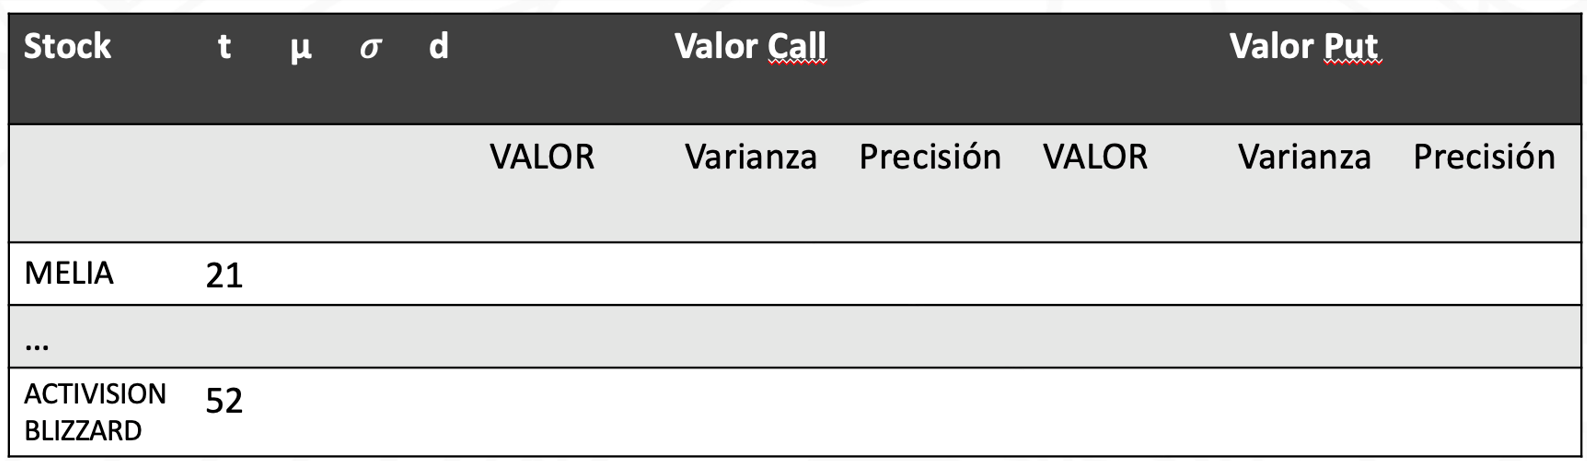


4. **Importante:** Incluid un informe final sobre los resultados que contenga conclusiones y recomendaciones.

https://es.tradingeconomics.com/germany/government-bond-yield

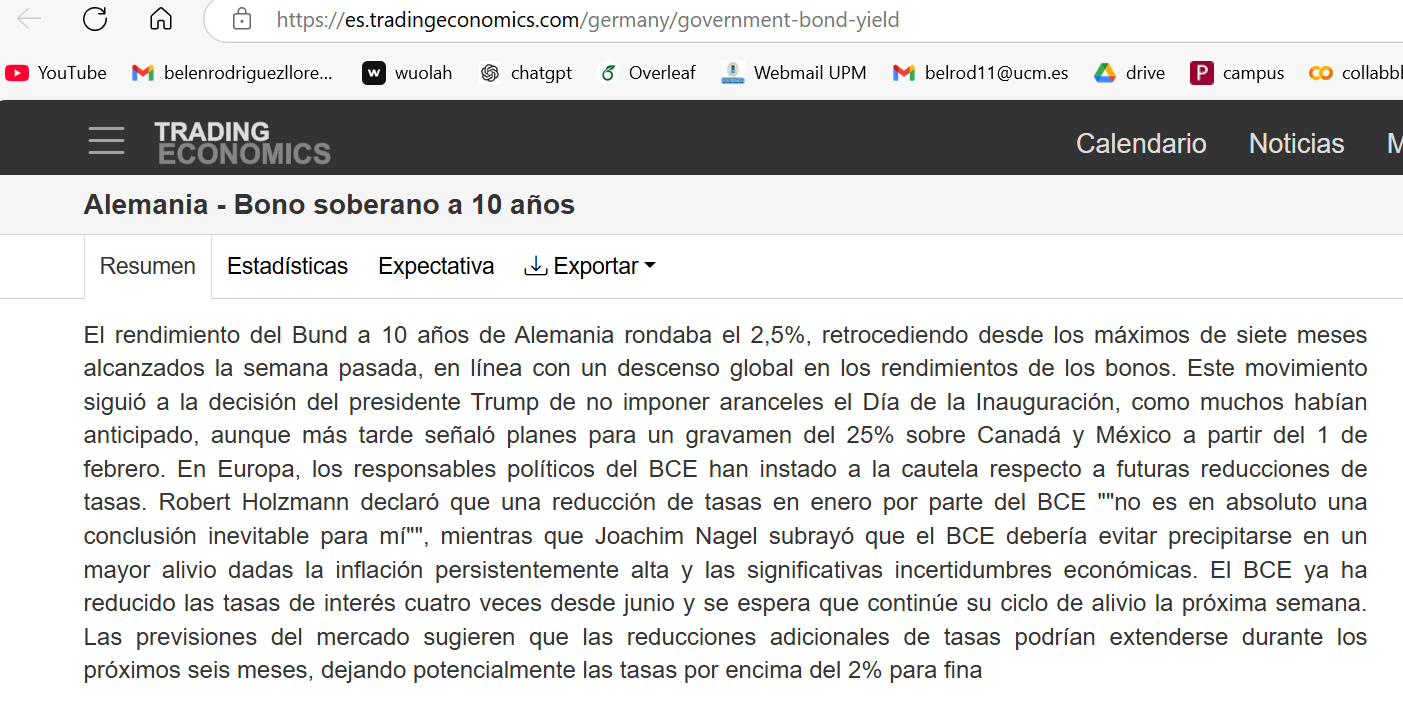

In [ ]:
df=pd.read_pickle("historico_desde_2023_trabajo_MNFI.pkl")

In [ ]:
df.head()

Price      Adj Close                                            Close          \
Ticker       BBVA.MC    IBE.MC     ITX.MC    SAN.MC    TEF.MC BBVA.MC  IBE.MC   
Date                                                                            
2023-01-02  5.046885  9.890812  24.416512  2.621308  2.963753   5.782  11.010   
2023-01-03  5.122824  9.859370  24.206678  2.628207  2.972359   5.869  10.975   
2023-01-04  5.324455  9.980646  24.941082  2.725718  3.043785   6.100  11.110   
2023-01-05  5.371589  9.931238  25.103226  2.735838  3.048948   6.154  11.055   
2023-01-06  5.420470  9.958633  25.570572  2.802532  3.056693   6.210  10.905   

Price                                 ...    Open                            \
Ticker         ITX.MC  SAN.MC TEF.MC  ... BBVA.MC  IBE.MC     ITX.MC SAN.MC   
Date                                  ...                                     
2023-01-02  25.600000  2.8495  3.444  ...   5.691  10.985  25.200001  2.824   
2023-01-03  25.379999  2.8570  3.454  ...   5.763  10.995  25.590000  2.838   
2023-01-04  26.150000  2.9630  3.537  ...   5.900  11.035  25.610001  2.879   
2023-01-05  26.320000  2.9740  3.543  ...   6.070  11.080  26.080000  2.938   
2023-01-06  26.809999  3.0465  3.552  ...   6.170  10.900  26.400000  2.990   

Price                Volume                                         
Ticker     TEF.MC   BBVA.MC    IBE.MC   ITX.MC    SAN.MC    TEF.MC  
Date                                                                
2023-01-02  3.405   7785857   6145278  1072887  20066687   6152649  
2023-01-03  3.455  13860514  38770022  2148482  37585314  10420608  
2023-01-04  3.474  24333498  14501327  2913057  53718756  14922271  
2023-01-05  3.515  15587600  14682254  1927536  36143898  12867078  
2023-01-06  3.550  12498717  12113239  1802879  40652999   9208953  

[5 rows x 30 columns]

In [ ]:
df.columns

MultiIndex([('Adj Close', 'BBVA.MC'),
            ('Adj Close',  'IBE.MC'),
            ('Adj Close',  'ITX.MC'),
            ('Adj Close',  'SAN.MC'),
            ('Adj Close',  'TEF.MC'),
            (    'Close', 'BBVA.MC'),
            (    'Close',  'IBE.MC'),
            (    'Close',  'ITX.MC'),
            (    'Close',  'SAN.MC'),
            (    'Close',  'TEF.MC'),
            (     'High', 'BBVA.MC'),
            (     'High',  'IBE.MC'),
            (     'High',  'ITX.MC'),
            (     'High',  'SAN.MC'),
            (     'High',  'TEF.MC'),
            (      'Low', 'BBVA.MC'),
            (      'Low',  'IBE.MC'),
            (      'Low',  'ITX.MC'),
            (      'Low',  'SAN.MC'),
            (      'Low',  'TEF.MC'),
            (     'Open', 'BBVA.MC'),
            (     'Open',  'IBE.MC'),
            (     'Open',  'ITX.MC'),
            (     'Open',  'SAN.MC'),
            (     'Open',  'TEF.MC'),
            (   'Volume', 'BBVA.MC'),
            

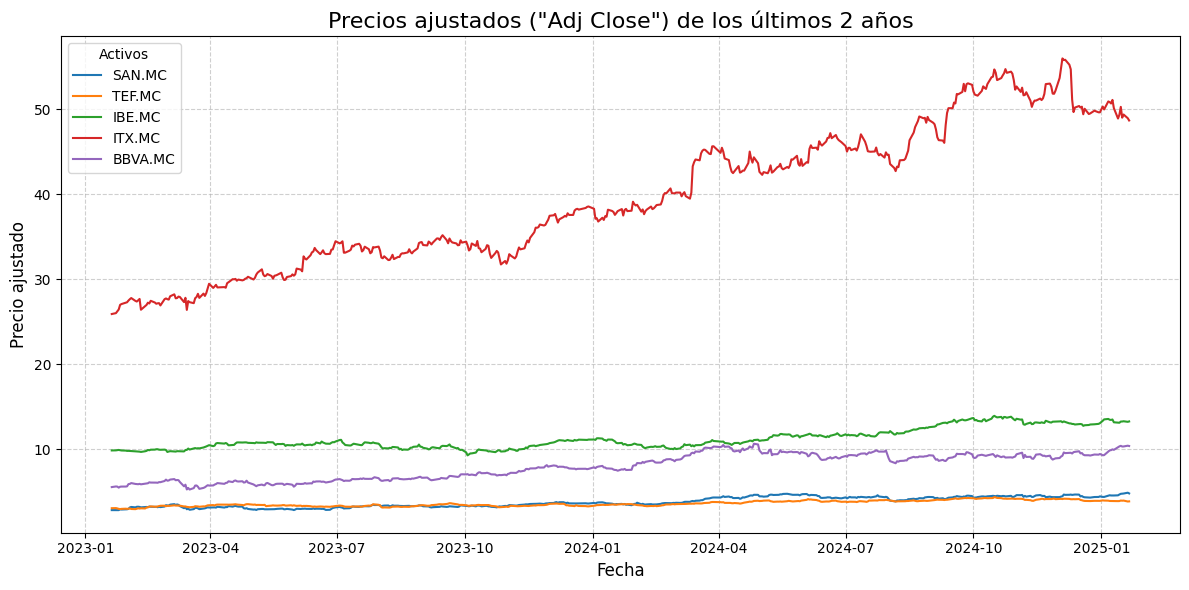

In [ ]:
# Crear una figura y un eje para graficar
plt.figure(figsize=(12, 6))

# Iterar sobre los activos para graficar
for asset in assets:
  # Filtrar los datos de los últimos dos años
    fecha_inicio = pd.to_datetime('2023-01-20')  # Hace dos años desde la fecha objetivo
    precios_activo = df['Adj Close'][asset]
    fecha_final = precios_activo.index.max()  # Última fecha disponible
    precios_activo.index = pd.to_datetime(precios_activo.index)

    # Filtrar los precios en el rango de fechas
    precios_filtrados = precios_activo[(precios_activo.index >= fecha_inicio) & (precios_activo.index <= fecha_final)]

    # Graficar los precios ajustados
    plt.plot(precios_filtrados.index, precios_filtrados.values, label=asset)

# Personalizar la gráfica
plt.title('Precios ajustados ("Adj Close") de los últimos 2 años', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio ajustado', fontsize=12)
plt.legend(title='Activos', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Mostrar la gráfica
plt.show()

In [ ]:
# Definir la fecha objetivo
fecha_objetivo = '2025-01-20'

# Crear listas para almacenar los resultados
precios_cierre = []
medias=[]
volatilidades_historicas = []




# Iterar sobre los activos
for asset in assets:
    # Extraer precios ajustados del activo del df multiíndice
    precios_activo = df['Adj Close'][asset]
    precios_activo.index = pd.to_datetime(precios_activo.index)

    # Obtener el precio más cercano a la fecha objetivo
    fecha_objetivo = '2025-01-20'  # Fecha objetivo
    fecha_cercana = precios_activo.index.searchsorted(pd.to_datetime(fecha_objetivo))
    if fecha_cercana == len(precios_activo):
        fecha_cercana -= 1
    S0 = precios_activo.iloc[fecha_cercana]  # Precio de cierre en la fecha objetivo

    # Calcular la volatilidad histórica a partir de los últimos 100 precios de cierre
    precios_recientes = precios_activo[-100:]

    # Calcular sigma: Volatilidad histórica
    log_retornos = np.log(precios_recientes / precios_recientes.shift(1))
    mu = (log_retornos.mean()) * 252  # Rendimiento esperado Escalado a un año
    sigma_historica = log_retornos.std() * np.sqrt(252)  # Volatilidad anualizada

    # Guardar resultados
    precios_cierre.append(S0)
    medias.append(mu)
    volatilidades_historicas.append(sigma_historica)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Activo': assets,
    'S0': precios_cierre,
    'Drift (μ)' : medias,
    'Volatilidad histórica ': volatilidades_historicas
})

# Mostrar los resultados
resultados

,Activo,S0,Drift (μ),Volatilidad histórica
0,SAN.MC,4.895000,0.229929,0.262103
1,TEF.MC,3.862000,-0.048183,0.145492
2,IBE.MC,13.235000,0.132893,0.158890
3,ITX.MC,48.950001,-0.002808,0.231691
4,BBVA.MC,10.425000,0.281602,0.280558


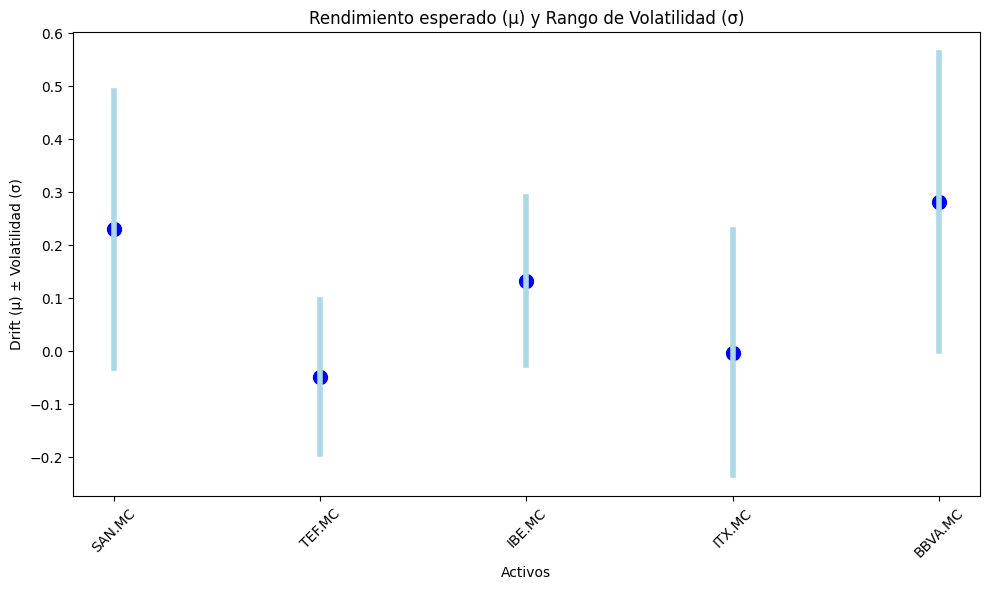

In [ ]:
# Inicializar la figura
plt.figure(figsize=(10, 6))

# Iterar sobre los activos y agregar las líneas y puntos para cada uno
for i, activo in enumerate(resultados['Activo']):
    mu = resultados['Drift (μ)'][i]  # Drift (rendimiento esperado)
    sigma = resultados['Volatilidad histórica '][i]  # Volatilidad histórica

    # Dibujar la línea de error: de μ - σ a μ + σ
    plt.plot([activo, activo], [mu - sigma, mu + sigma], color='lightblue', lw=4)

    # Dibujar el punto para el Drift (μ)
    plt.scatter(activo, mu, color='blue', s=100, label=f'{activo} Drift' if i == 0 else "")

# Etiquetas de los ejes y título
plt.xlabel('Activos')
plt.ylabel('Drift (μ) ± Volatilidad (σ)')
plt.title('Rendimiento esperado (μ) y Rango de Volatilidad (σ)')

# Mejorar la visualización en el eje X (añadir etiquetas de los activos)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [ ]:
# Datos
S0 = precios_cierre # subyacente inicial
K = S0 # strike
r = 0.025 # Tasa de interés libre de riesgo
sigma = volatilidades_historicas #volatilidad histórica
T_values = [21/52, 1] # tiempos en los que se evaluaran las opciones de los activos: semana 21 y semana 52, como hay 52 semanas en un año pues calculamos en años la proporción.

n = 252 # nº de pasos
#delta = T_values/n # 252 días que hay en un año de mercado

N = 1000 #número de simulaciones
alpha = 0.05 #nivel de significación
x0 = 123456789 #semilla

In [ ]:
# Asegurarse de que las fechas están en formato datetime
df.index = pd.to_datetime(df.index)

# Filtrar por el año 2024
df_2024 = df[df.index.year == 2024]

# Crear un diccionario para almacenar las diferencias de cada acción
diferencias = {}

for ticker in assets:
    # Extraer Close y Adj Close para la acción
    close = df_2024['Close'][ticker]
    adj_close = df_2024['Adj Close'][ticker]

    # Calcular la diferencias
    diferencias[ticker] = close - adj_close

# Convertir el diccionario a un DataFrame para facilitar la visualización
df_diferencias = pd.DataFrame(diferencias)

# Mostrar las diferencias por acción
print(df_diferencias)

              SAN.MC    TEF.MC    IBE.MC    ITX.MC   BBVA.MC
Date                                                        
2024-01-02  0.159560  0.253140  0.724360  0.858379  0.542797
2024-01-03  0.157324  0.254047  0.721919  0.832069  0.535968
2024-01-04  0.160657  0.258024  0.733814  0.833382  0.544987
2024-01-05  0.162003  0.257745  0.734118  0.824833  0.548465
2024-01-08  0.162707  0.260397  0.731679  0.834698  0.554134
...              ...       ...       ...       ...       ...
2024-12-23  0.000000  0.000000  0.219904  0.000000  0.000000
2024-12-24  0.000000  0.000000  0.220912  0.000000  0.000000
2024-12-27  0.000000  0.000000  0.221333  0.000000  0.000000
2024-12-30  0.000000  0.000000  0.222174  0.000000  0.000000
2024-12-31  0.000000  0.000000  0.223602  0.000000  0.000000

[256 rows x 5 columns]


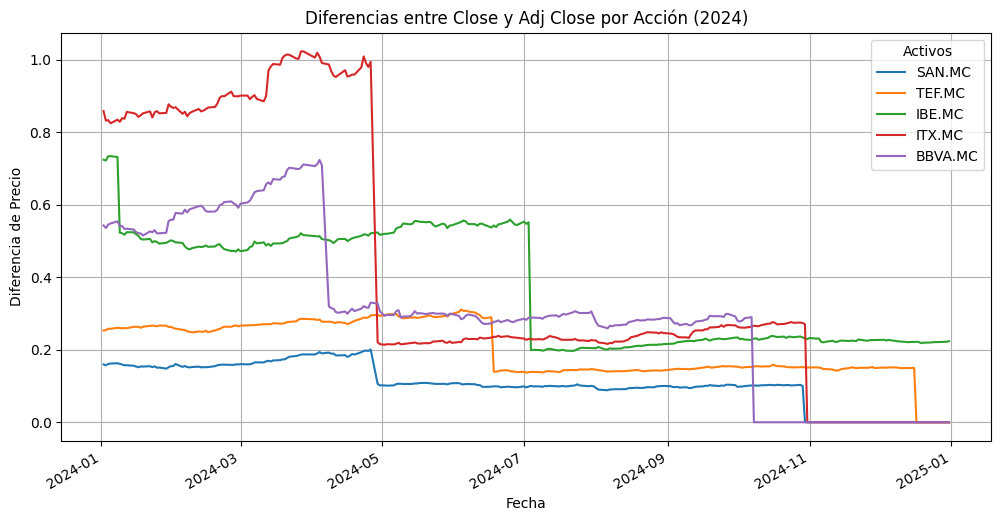

In [ ]:
import matplotlib.pyplot as plt

# Asegúrate de que df_diferencias tiene el formato correcto para graficar
df_diferencias.plot(figsize=(12, 6), title="Diferencias entre Close y Adj Close por Acción (2024)")

# Etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Diferencia de Precio')
plt.legend(title="Activos")
plt.grid(True)
plt.show()

In [ ]:
# Asegurarse de que las fechas están en formato datetime
df.index = pd.to_datetime(df.index)

# Definir el rango de fechas específico
fecha_inicio = '2024-01-20'
fecha_fin = '2025-01-20'

# Filtrar el DataFrame entre las fechas específicas
df_rango = df[(df.index >= fecha_inicio) & (df.index <= fecha_fin)]

# Lista para almacenar los dividendos divididos por S0
resultado_dividendo_s0 = []

# Umbral para filtrar dividendos pequeños
umbral = 1e-4

# Iterar sobre los activos
for i, activo in enumerate(assets):
    # Extraer Close y Adj Close para la acción
    adj_close_anterior = df_rango['Adj Close'][activo].shift(1)  # Adj Close del día anterior
    adj_close_actual = df_rango['Adj Close'][activo].shift(0)  # Adj Close del día siguiente
    close_anterior = df_rango['Close'][activo].shift(1)  # Close del día anterior
    close_actual = df_rango['Close'][activo].shift(0)  # Close del día siguiente

    # Calcular el dividendo
    dividendo = ((close_anterior * adj_close_actual) / adj_close_anterior) - close_actual

    # Filtrar dividendos significativos y sumarlos
    dividendos_activo = 0
    dividendos_detalle = []  # Lista para almacenar detalles por cada dividendo
    for j in dividendo.index:
        if not np.isnan(dividendo.loc[j]) and dividendo.loc[j] > umbral:
            dividendos_activo += dividendo.loc[j]
            # Guardar detalles de cada dividendo
            dividendos_detalle.append({
                'date': j,
                'dividend': dividendo.loc[j]
            })

    # Dividir el total de dividendos por S0
    resultado_dividendo_activo = dividendos_activo / S0[i]

    # Añadir el resultado a la lista (solo dividendos ajustados por S0)
    resultado_dividendo_s0.append(resultado_dividendo_activo)

    # Imprimir los dividendos por activo, fecha y dividendo
    print(f"Activo: {activo}")
    print(f"  Dividendos totales ajustados (dividido por S0): {resultado_dividendo_activo:.6f}")
    print("  Detalle de dividendos:")
    for div in dividendos_detalle:
        print(f"    Fecha: {div['date'].strftime('%Y-%m-%d')}, Dividendo: {div['dividend']:.6f}")
    print("-" * 40)

Activo: SAN.MC
  Dividendos totales ajustados (dividido por S0): 0.039895
  Detalle de dividendos:
    Fecha: 2024-04-29, Dividendo: 0.094900
    Fecha: 2024-10-30, Dividendo: 0.100387
----------------------------------------
Activo: TEF.MC
  Dividendos totales ajustados (dividido por S0): 0.076696
  Detalle de dividendos:
    Fecha: 2024-06-18, Dividendo: 0.149888
    Fecha: 2024-12-17, Dividendo: 0.146311
----------------------------------------
Activo: IBE.MC
  Dividendos totales ajustados (dividido por S0): 0.043340
  Detalle de dividendos:
    Fecha: 2024-07-04, Dividendo: 0.348234
    Fecha: 2025-01-10, Dividendo: 0.225374
----------------------------------------
Activo: ITX.MC
  Dividendos totales ajustados (dividido por S0): 0.020882
  Detalle de dividendos:
    Fecha: 2024-04-29, Dividendo: 0.757905
    Fecha: 2024-10-31, Dividendo: 0.264290
----------------------------------------
Activo: BBVA.MC
  Dividendos totales ajustados (dividido por S0): 0.065202
  Detalle de dividend

In [ ]:
# Crear un DataFrame para almacenar resultados con todas las columnas
columns = ["Stock", "t (semana)", "μ", "σ", "d", "Valor Call", "Varianza Call", "Precisión Call", "Valor Put", "Varianza Put", "Precisión Put"]
tabla_resultados = []

# Iterar sobre los activos
for i, asset in enumerate(assets):
    # Obtener la serie de precios del activo
    precios_activo = df[('Adj Close', asset)]
    precios_activo.index = pd.to_datetime(precios_activo.index)

    # Obtener el precio más cercano a la fecha objetivo
    fecha_objetivo = '2025-01-20'  # Fecha objetivo
    fecha_cercana = precios_activo.index.searchsorted(pd.to_datetime(fecha_objetivo))
    if fecha_cercana == len(precios_activo):
        fecha_cercana -= 1
    S0 = precios_activo.iloc[fecha_cercana]  # Precio de cierre en la fecha objetivo

    # Calcular la volatilidad histórica a partir de los últimos 100 precios de cierre
    precios_recientes = precios_activo[-100:]
    log_retornos = np.log(precios_recientes / precios_recientes.shift(1)).dropna()
    mu = log_retornos.mean()* 252  # Rendimiento esperado Escalado a un año
    sigma = log_retornos.std() * np.sqrt(252)  # Volatilidad anualizada (252 días de mercado)

    # Agregar fila al DataFrame con solo las primeras columnas rellenas
    tabla_resultados.append([asset, '21', mu, sigma, resultado_dividendo_s0[i], None, None, None, None, None, None])
    tabla_resultados.append([asset, '52', mu, sigma, resultado_dividendo_s0[i], None, None, None, None, None, None])

# Convertir a DataFrame
tabla_resultados = pd.DataFrame(tabla_resultados, columns=columns)

# Guardar en Excel
# tabla_resultados.to_excel("resultados_acciones_completos.xlsx", index=False)

# Mostrar tabla
tabla_resultados

,Stock,t (semana),μ,σ,d,Valor Call,Varianza Call,Precisión Call,Valor Put,Varianza Put,Precisión Put
0,SAN.MC,21,0.229929,0.262103,0.039895,None,None,None,None,None,None
1,SAN.MC,52,0.229929,0.262103,0.039895,None,None,None,None,None,None
2,TEF.MC,21,-0.048183,0.145492,0.076696,None,None,None,None,None,None
3,TEF.MC,52,-0.048183,0.145492,0.076696,None,None,None,None,None,None
4,IBE.MC,21,0.132893,0.158890,0.043340,None,None,None,None,None,None
5,IBE.MC,52,0.132893,0.158890,0.043340,None,None,None,None,None,None
6,ITX.MC,21,-0.002808,0.231691,0.020882,None,None,None,None,None,None
7,ITX.MC,52,-0.002808,0.231691,0.020882,None,None,None,None,None,None
8,BBVA.MC,21,0.281602,0.280558,0.065202,None,None,None,None,None,None
9,BBVA.MC,52,0.281602,0.280558,0.065202,None,None,None,None,None,None


Completemos la tabla con los datos de las simualciones para call y put:

In [ ]:
def congru(x0):
    m=2**(31)-1
    a=16807
    b=0
    x=(a*x0+b)%m
    x_u=x/m
    return(x,x_u)

def BoxMuller(x0):
    x0,u1=congru(x0)
    x0,u2=congru(x0)
    x=sqrt(-2*log(u1))*cos(2*pi*u2)
    y=sqrt(-2*log(u1))*sin(2*pi*u2)

    return x,y,x0

In [ ]:
# Lista para almacenar los resultados
resultados = []

# Simulaciones de Monte Carlo
for idx, asset in enumerate(assets):
    for T in T_values:
        delta = T / n  # Paso temporal
        num_steps = int(T / delta)  # Número de pasos en el tiempo
        rc = np.log(1 + r)  # Tasa compuesta
        sigma = volatilidades_historicas[idx]  # Usar volatilidad histórica
        dividendo = resultado_dividendo_s0[idx]  # Usar dividendo ajustado por S0
        S_inicial = precios_cierre[idx]

        # Lista para almacenar los precios finales
        final_prices = []

        # Monte Carlo
        for i in range(N):
            S = S_inicial  # Precio inicial del subyacente
            for _ in range(num_steps):
                z1, z2, x0 = BoxMuller(x0)  # Generar variable normal estándar
                S = S * (1 + r - dividendo) ** delta + sigma * S * np.sqrt(delta) * z2  # Ecuación estocástica con dividendos

            final_prices.append(S)

        # Calcular Call y Put
        V_call = np.mean([max(0, s - K[idx]) for s in final_prices]) * np.exp(-rc * T)
        Var_call = np.var([max(0, s - K[idx]) for s in final_prices], ddof=1) * np.exp(-2 * rc * T)
        from scipy.stats import norm,t
        Precision_call = t.ppf(1 - alpha / 2, df=N - 1) * np.sqrt(Var_call / N)

        V_put = np.mean([max(0, K[idx] - s) for s in final_prices]) * np.exp(-rc * T)
        Var_put = np.var([max(0, K[idx] - s) for s in final_prices], ddof=1) * np.exp(-2 * rc * T)
        Precision_put = t.ppf(1 - alpha / 2, df=N - 1) * np.sqrt(Var_put / N)

        # Guardar resultados para completar la tabla
        resultados.append({
            "Activo": asset,
            "T (años)": T,
            "Precio Inicial": S_inicial,
            "Volatilidad": sigma,
            "Dividendo": dividendo,
            "Call Valor": V_call,
            "Call Varianza": Var_call,
            "Call Precisión": Precision_call,
            "Put Valor": V_put,
            "Put Varianza": Var_put,
            "Put Precisión": Precision_put
        })

# Convertir resultados a DataFrame
resultados_df = pd.DataFrame(resultados)

# Ahora completar la tabla original con los resultados de Monte Carlo
for i, row in tabla_resultados.iterrows():
    asset = row['Stock']
    t = int(row['t (semana)'])
    T = t / 52  # Convertir semanas a años
    # Buscar el resultado correspondiente en la simulación de Monte Carlo
    simulacion = resultados_df[(resultados_df['Activo'] == asset) & (resultados_df['T (años)'] == T)]
    if not simulacion.empty:
        tabla_resultados.at[i, 'Valor Call'] = simulacion['Call Valor'].values[0]
        tabla_resultados.at[i, 'Varianza Call'] = simulacion['Call Varianza'].values[0]
        tabla_resultados.at[i, 'Precisión Call'] = simulacion['Call Precisión'].values[0]
        tabla_resultados.at[i, 'Valor Put'] = simulacion['Put Valor'].values[0]
        tabla_resultados.at[i, 'Varianza Put'] = simulacion['Put Varianza'].values[0]
        tabla_resultados.at[i, 'Precisión Put'] = simulacion['Put Precisión'].values[0]

# Mostrar tabla final completada
tabla_resultados

,Stock,t (semana),μ,σ,d,Valor Call,Varianza Call,Precisión Call,Valor Put,Varianza Put,Precisión Put
0,SAN.MC,21,0.229929,0.262103,0.039895,0.32719,0.283218,0.033024,0.316563,0.183116,0.026554
1,SAN.MC,52,0.229929,0.262103,0.039895,0.466548,0.652891,0.050141,0.515639,0.410184,0.039743
2,TEF.MC,21,-0.048183,0.145492,0.076696,0.102909,0.035502,0.011692,0.186866,0.050019,0.013879
3,TEF.MC,52,-0.048183,0.145492,0.076696,0.14434,0.07614,0.017123,0.306243,0.110516,0.020629
4,IBE.MC,21,0.132893,0.158890,0.043340,0.480552,0.570654,0.046877,0.558165,0.578021,0.047179
5,IBE.MC,52,0.132893,0.158890,0.043340,0.702765,1.47528,0.075372,0.912924,1.312396,0.07109
6,ITX.MC,21,-0.002808,0.231691,0.020882,2.658428,19.202352,0.271927,2.903204,15.204136,0.241967
7,ITX.MC,52,-0.002808,0.231691,0.020882,4.842671,62.246641,0.48959,4.07083,28.587493,0.331789
8,BBVA.MC,21,0.281602,0.280558,0.065202,0.562943,1.050948,0.063616,0.825148,1.06853,0.064146
9,BBVA.MC,52,0.281602,0.280558,0.065202,0.928053,2.894144,0.105569,1.305992,2.169581,0.091403


In [ ]:
def black_scholes(S, K, T, r, d, sigma, tipo="call"):
    """
    Calcula el precio de una opción Call o Put utilizando el modelo de Black-Scholes ajustado para dividendos.

    Parámetros:
        S: Precio actual del activo subyacente
        K: Precio de ejercicio
        T: Tiempo hasta el vencimiento (en años)
        r: Tasa de interés libre de riesgo
        d: Tasa de dividendos
        sigma: Volatilidad del subyacente
        tipo: "call" o "put"

    Retorna:
        Precio teórico de la opción
    """
    rc = np.log(1 + r)
    dc = np.log(1 + d)
    d1 = (np.log(S / K) + (rc - dc + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if tipo == "call":
        return S * np.exp(-dc * T) * norm.cdf(d1) - K * np.exp(-rc * T) * norm.cdf(d2)
    elif tipo == "put":
        return K * np.exp(-rc * T) * norm.cdf(-d2) - S * np.exp(-dc * T) * norm.cdf(-d1)
    else:
        raise ValueError("El tipo debe ser 'call' o 'put'.")


# Derivada parcial de Black-Scholes con respecto a sigma (Vega)
def vega(S, K, T, r, d, sigma):
    """
    Calcula la Vega de una opción, es decir, la sensibilidad del precio de la opción al cambio en la volatilidad.

    Parámetros:
        S: Precio actual del activo subyacente
        K: Precio de ejercicio
        T: Tiempo hasta el vencimiento (en años)
        r: Tasa de interés libre de riesgo
        d: Tasa de dividendos
        sigma: Volatilidad del subyacente

    Retorna:
        Valor de la Vega
    """
    rc = np.log(1 + r)
    dc = np.log(1 + d)
    d1 = (np.log(S / K) + (rc - dc + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * np.exp(-dc * T) * norm.pdf(d1) * np.sqrt(T)

# Método de Newton-Raphson para calcular la volatilidad implícita
def volatilidad_implicita(S, K, T, r, d, C_mercado, sigma_inicial=0.2, tol=1e-6, max_iter=100, tipo="call"):
    """
    Calcula la volatilidad implícita utilizando el método de Newton-Raphson.

    Parámetros:
        S: Precio actual del activo subyacente
        K: Precio de ejercicio
        T: Tiempo hasta el vencimiento (en años)
        r: Tasa de interés libre de riesgo
        d: Tasa de dividendos
        precio_opcion: Precio observado de la opción
        tipo: "call" o "put"
        sigma_inicial: Valor inicial de la volatilidad
        tol: Tolerancia para la convergencia
        max_iter: Número máximo de iteraciones

    Retorna:
        Volatilidad implícita si converge, o None si no converge.
    """
    sigma = sigma_inicial

    for _ in range(max_iter):
        # Calcular el precio teórico de la opción
        C_teorico = black_scholes(S, K, T, r, d, sigma, tipo)

        # Calcular el error (diferencia entre precio calculado y observado)
        diferencia = C_teorico - C_mercado

        # Verificar si el error está dentro de la tolerancia
        if abs(diferencia) < tol:
            return sigma

        # Calcular Vega (derivada respecto a sigma)
        vega_sigma = vega(S, K, T, r, d, sigma)

        # Prevenir divisiones por valores muy pequeños de Vega
        if vega_sigma < 1e-10:
            return None

        # Actualizar sigma utilizando el método de Newton-Raphson
        sigma -= diferencia / vega_sigma

    # Si no converge después de max_iter iteraciones
    return None

In [ ]:
# Bucle para calcular la volatilidad implícita
resultados = []

for idx, asset in enumerate(assets):
    S_inicial = precios_cierre[idx]  # Precio inicial del subyacente
    K_idx = precios_cierre[idx]
    # Filtrar el valor de V_call para el activo actual
    valor_v_call = resultados_df[resultados_df['Activo'] == asset]['Call Valor'].values[0]

    # Ahora puedes usar ese valor de V_call como C_mercado para el activo
    C_mercado = valor_v_call

    # Luego puedes usar C_mercado en la función de volatilidad implícita
    volatilidad_imp = volatilidad_implicita(S_inicial, K_idx, T=1, r=r, d=resultado_dividendo_s0[idx], C_mercado=C_mercado)

    # Aquí puedes continuar con los cálculos o almacenar resultados
    print(f"Volatilidad implícita para semana 52 para call {asset}: {volatilidad_imp}")

Volatilidad implícita para semana 52 para call SAN.MC: 0.1908029670905669
Volatilidad implícita para semana 52 para call TEF.MC: 0.12211816698048666
Volatilidad implícita para semana 52 para call IBE.MC: 0.11504414492931471
Volatilidad implícita para semana 52 para call ITX.MC: 0.13425075727886449
Volatilidad implícita para semana 52 para call BBVA.MC: 0.1859399146001284


In [ ]:
# Bucle para calcular la volatilidad implícita
resultados = []

for idx, asset in enumerate(assets):
    S_inicial = precios_cierre[idx]  # Precio inicial del subyacente
    K_idx = precios_cierre[idx]
    # Filtrar el valor de V_call para el activo actual
    valor_v_call = resultados_df[resultados_df['Activo'] == asset]['Call Valor'].values[0]

    # Ahora puedes usar ese valor de V_call como C_mercado para el activo
    C_mercado = valor_v_call

    # Luego puedes usar C_mercado en la función de volatilidad implícita
    volatilidad_imp = volatilidad_implicita(S_inicial, K_idx, T=21/52, r=r, d=resultado_dividendo_s0[idx], C_mercado=C_mercado)

    # Aquí puedes continuar con los cálculos o almacenar resultados
    print(f"Volatilidad implícita para semana 21 para call {asset}: {volatilidad_imp}")

Volatilidad implícita para semana 21 para call SAN.MC: 0.27877414268914225
Volatilidad implícita para semana 21 para call TEF.MC: 0.14304988142930597
Volatilidad implícita para semana 21 para call IBE.MC: 0.15896528235103052
Volatilidad implícita para semana 21 para call ITX.MC: 0.2131296382098201
Volatilidad implícita para semana 21 para call BBVA.MC: 0.2464866451862117


In [ ]:
# Bucle para calcular la volatilidad implícita
resultados = []

for idx, asset in enumerate(assets):
    S_inicial = precios_cierre[idx]  # Precio inicial del subyacente
    K_idx = precios_cierre[idx]
    # Filtrar el valor de V_put para el activo actual
    valor_v_put = resultados_df[resultados_df['Activo'] == asset]['Put Valor'].values[0]

    # Ahora puedes usar ese valor de V_put como C_mercado para el activo
    C_mercado = valor_v_put

    # Luego puedes usar C_mercado en la función de volatilidad implícita
    volatilidad_imp = volatilidad_implicita(S_inicial, K_idx, T=1, r=r, d=resultado_dividendo_s0[idx], C_mercado=C_mercado, tipo="put")

    # Aquí puedes continuar con los cálculos o almacenar resultados
    print(f"Volatilidad implícita para semana 52 para put {asset}: {volatilidad_imp}")

Volatilidad implícita para semana 52 para put SAN.MC: 0.14871433438899662
Volatilidad implícita para semana 52 para put TEF.MC: 0.03725107750595459
Volatilidad implícita para semana 52 para put IBE.MC: 0.08528016739112042
Volatilidad implícita para semana 52 para put ITX.MC: 0.15723239591947263
Volatilidad implícita para semana 52 para put BBVA.MC: 0.15446321508484126


In [ ]:
# Bucle para calcular la volatilidad implícita
resultados = []

for idx, asset in enumerate(assets):
    S_inicial = precios_cierre[idx]  # Precio inicial del subyacente
    K_idx = precios_cierre[idx]
    # Filtrar el valor de V_put para el activo actual
    valor_v_put = resultados_df[resultados_df['Activo'] == asset]['Put Valor'].values[0]

    # Ahora puedes usar ese valor de V_put como C_mercado para el activo
    C_mercado = valor_v_put

    # Luego puedes usar C_mercado en la función de volatilidad implícita
    volatilidad_imp = volatilidad_implicita(S_inicial, K_idx, T=21/52, r=r, d=resultado_dividendo_s0[idx], C_mercado=C_mercado, tipo="put")

    # Aquí puedes continuar con los cálculos o almacenar resultados
    print(f"Volatilidad implícita para semana 21 para put {asset}: {volatilidad_imp}")

Volatilidad implícita para semana 21 para put SAN.MC: 0.24698720586722764
Volatilidad implícita para semana 21 para put TEF.MC: 0.15235936930499447
Volatilidad implícita para semana 21 para put IBE.MC: 0.1541430433607531
Volatilidad implícita para semana 21 para put ITX.MC: 0.23951711538669518
Volatilidad implícita para semana 21 para put BBVA.MC: 0.28649768915378154
